In [143]:
import pandas as pd
dataset = pd.read_csv('callcenter_marketing.csv')

def muda_resultado(value):
    if value == 'nao': 
        return 0 # not admitted
    return 1 # admitted

In [144]:
dataset.head()
#dataset.isnull().sum()


,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,resultado
0,56,dona_casa,casado,fundamental_4a,nao,nao,nao,telefone,mai,seg,261,1,999,0,nao_existente,93.994,-36.4,4.857,nao
1,57,servicos,casado,ensino_medio,NaN,nao,nao,telefone,mai,seg,149,1,999,0,nao_existente,93.994,-36.4,4.857,nao
2,37,servicos,casado,ensino_medio,nao,sim,nao,telefone,mai,seg,226,1,999,0,nao_existente,93.994,-36.4,4.857,nao
3,40,admin.,casado,fundamental_6a,nao,nao,nao,telefone,mai,seg,151,1,999,0,nao_existente,93.994,-36.4,4.857,nao
4,56,servicos,casado,ensino_medio,nao,nao,sim,telefone,mai,seg,307,1,999,0,nao_existente,93.994,-36.4,4.857,nao


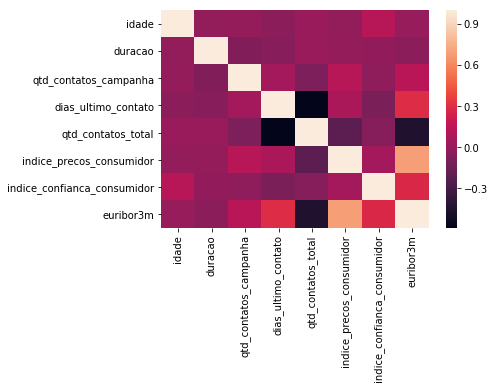

In [145]:
import seaborn as sns
sns.heatmap(dataset.corr())

In [146]:
## SEPARANDO CATEGÓRICO E NUMERICO

In [395]:
dataset_categorico = dataset[['profissao','emprestimo_moradia','educacao','meio_contato', 'inadimplente', 'emprestimo_pessoal', 'mes', 'dia_da_semana', 'campanha_anterior']]
dataset_numerico = dataset[['idade', 'duracao', 'qtd_contatos_campanha', 'dias_ultimo_contato', 'qtd_contatos_total', 'indice_precos_consumidor', 'indice_confianca_consumidor', 'euribor3m']]

In [396]:
for col_name in dataset_categorico.columns:
    dataset_categorico[col_name].fillna('NAO INFORMOU!!!!!!', inplace=True)

C:\Users\Gabriel\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [397]:
dataset_categorico.head()

,profissao,emprestimo_moradia,educacao,meio_contato,inadimplente,emprestimo_pessoal,mes,dia_da_semana,campanha_anterior
0,dona_casa,nao,fundamental_4a,telefone,nao,nao,mai,seg,nao_existente
1,servicos,nao,ensino_medio,telefone,NAO INFORMOU!!!!!!,nao,mai,seg,nao_existente
2,servicos,sim,ensino_medio,telefone,nao,nao,mai,seg,nao_existente
3,admin.,nao,fundamental_6a,telefone,nao,nao,mai,seg,nao_existente
4,servicos,nao,ensino_medio,telefone,nao,sim,mai,seg,nao_existente


In [398]:
dataset_categorico_corrigido = pd.get_dummies(dataset_categorico)
dataset_categorico_corrigido.head()

,profissao_NAO INFORMOU!!!!!!,profissao_admin.,profissao_aposentado,profissao_colarinho_azul,profissao_desempregado,profissao_dona_casa,profissao_empreendedor,profissao_estudante,profissao_gerente,profissao_informal,...,mes_out,mes_set,dia_da_semana_qua,dia_da_semana_qui,dia_da_semana_seg,dia_da_semana_sex,dia_da_semana_ter,campanha_anterior_fracasso,campanha_anterior_nao_existente,campanha_anterior_sucesso
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [399]:
X = pd.concat([dataset_categorico_corrigido, dataset_numerico], axis=1)

In [400]:
X.head()

,profissao_NAO INFORMOU!!!!!!,profissao_admin.,profissao_aposentado,profissao_colarinho_azul,profissao_desempregado,profissao_dona_casa,profissao_empreendedor,profissao_estudante,profissao_gerente,profissao_informal,...,campanha_anterior_nao_existente,campanha_anterior_sucesso,idade,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,indice_precos_consumidor,indice_confianca_consumidor,euribor3m
0,0,0,0,0,0,1,0,0,0,0,...,1,0,56,261,1,999,0,93.994,-36.4,4.857
1,0,0,0,0,0,0,0,0,0,0,...,1,0,57,149,1,999,0,93.994,-36.4,4.857
2,0,0,0,0,0,0,0,0,0,0,...,1,0,37,226,1,999,0,93.994,-36.4,4.857
3,0,1,0,0,0,0,0,0,0,0,...,1,0,40,151,1,999,0,93.994,-36.4,4.857
4,0,0,0,0,0,0,0,0,0,0,...,1,0,56,307,1,999,0,93.994,-36.4,4.857


In [401]:
from sklearn.model_selection import train_test_split
y = dataset.iloc[:,[18]]
yNumerico['resultado'] = y['resultado'].apply(muda_resultado)

x_train, x_test, y_train, y_test = train_test_split(X, yNumerico,test_size=0.3, random_state=0) 

C:\Users\Gabriel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [402]:
##ZERANDO INDICES

In [403]:
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [404]:
##CRIANDO O MODELO

In [405]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()# crio o modelo
lr.fit(x_train,y_train)# faco o fit do modelo(reta)

previsto = lr.predict(x_test)#predicao nos dados teste

In [406]:
def categorize(value):
    if value <= 0.50: 
        return 0 # not admitted
    return 1 # admitted

In [407]:
import pandas as pd
import numpy as np

serie_prevista = pd.Series((i[0] for i in previsto)) 
serie_prevista = serie_prevista.apply(categorize)
# cria nova coluna no y_test
y_test['ximbinha'] = (y_test['resultado']).apply(categorize)

print('A acuracia é: '+str((np.count_nonzero(serie_prevista.values==y_test['ximbinha'])/serie_prevista.size)*100))

A acuracia é: 90.45075665614631


C:\Users\Gabriel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
